# Gradient Descent 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
# Load breast cancer dataset
data = load_breast_cancer()

In [41]:
X = data.data
y = data.target
# Normalize the features (not using StandardScaler this time)
X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
# Add a column of ones to represent the bias term
X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [42]:
# Define the cost function
def loss(X, y, w):
    m = len(y)
    h = X @ w
    J = (1/(2*m)) * np.sum((h - y)**2)
    return J

# Define the gradient descent function
def gradient_descent(X, y, w, learning_rate, epochs):
    m = len(y)
    loss_history = np.zeros(epochs)
    for i in range(epochs):
        h = X @ w
        w = w - (learning_rate/m) * (X.T @ (h - y))
        loss_history[i] = loss(X, y, w)
    return w, loss_history

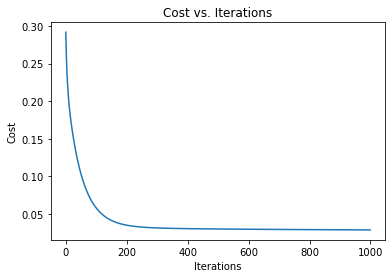

In [43]:
# Initialize the parameters and hyperparameters
w = np.zeros(X_norm.shape[1])
learning_rate = 0.01
epochs = 1000

# Run gradient descent on the training set
w, loss_history = gradient_descent(X_train, y_train, w, learning_rate, epochs)

# Plot the cost function over iterations
plt.plot(range(epochs), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [44]:
# Evaluate the model on the test set
y_pred = np.round(X_test @ w)
accuracy = np.mean(y_pred == y_test)
print('Accuracy on test set: {:.2f}%'.format(accuracy*100))

Accuracy on test set: 94.74%
